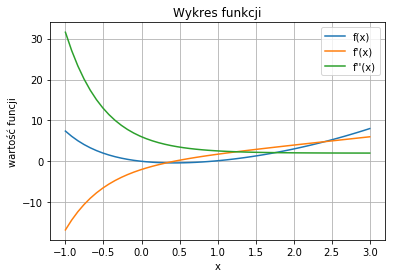

Na podstawię wykresów szacuje miejsca zerowe wunkcji: 0 oraz 0.9
Określam przedziały do sprawdzania miejsc zerowych funkcji: <-0,5;0,5> oraz <0,5;1,5>


In [2]:
#zadanie1

import matplotlib.pyplot as plt
import numpy as np
import math

naglowki = [" ", "bisekcja","newton", "sieczne"]
czasy_wlasne=["wlasne","","",""]
czasy_bib=["biblioteka","","",""]

def f(x):
    return math.exp(-2*x)+x**2-1

def derivative(x):
    return -2*math.exp(-2*x)+2*x

def derivative2(x):
    return 4*math.exp(-2*x)+2


x = np.linspace(-1,3)
y1 = []
for i in x:
    y1.append(f(i))
    
y2 = []
for i in x:
    y2.append(derivative(i))
    
y3 = []
for i in x:
    y3.append(derivative2(i))

plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)

plt.title('Wykres funkcji')
plt.xlabel('x')
plt.ylabel('wartość funcji')
plt.legend(['f(x)', 'f\'(x)','f\'\'(x)'])
plt.grid(True)
plt.show()

print("Na podstawię wykresów szacuje miejsca zerowe wunkcji: 0 oraz 0.9")
print("Określam przedziały do sprawdzania miejsc zerowych funkcji: <-0,5;0,5> oraz <0,5;1,5>")







In [3]:
#zadanie 2
print("Aby można było zastosować metodę bisekcji muszą zachodzić następujące warunki: ")
print("  1. funkcja f(x) jest ciągła w przedziale domkniętym [a,b]")
print("  2. funkcja przyjmuje różne znaki na końcach przedziału: f(a)f(b) < 0")
print("")

import time
import scipy.optimize as sc

def bisekcja(f, a, b, d=0.00001, maxn=100):
    if f(a)*f(b)>0:
        return -1;
    it = 0;
    while (d<abs(a-b) and it < maxn):
        mid=(a+b)/2;
        if(f(a)*f(mid)>0):
            a=mid
        else:
            b=mid
        it+=1
        
    return (a+b)/2,it
    
suma=0
for i in range (1000):
    start = time.clock()
    p1 = bisekcja(f,-0.5,0.5,10**(-10), 10000)
    p2 = bisekcja(f,0.5,1.5,10**(-10), 10000)
    end=time.clock()
    czas=end-start
    suma+=czas
srednia=str(suma/1000)
print (p1)
print(p2)
print ("Dla własnej bisekcji - czas wykonania obu: " + srednia+"s\n")
czasy_wlasne[1]=srednia


suma=0
for i in range (1000):
    start = time.clock()
    p1 = sc.bisect(f,-0.5,0.5,xtol=10**(-10), full_output=True)
    p2= sc.bisect(f,0.5,1.5,xtol=10**(-10),full_output=True)
    end=time.clock()
    czas=end-start
    suma+=czas
srednia=str(suma/1000)
czasy_bib[1]=srednia

print (p1)
print(p2)
print ("Dla bisekcji z biblioteki - czas wykonania obu: " + srednia+"s")


    

Aby można było zastosować metodę bisekcji muszą zachodzić następujące warunki: 
  1. funkcja f(x) jest ciągła w przedziale domkniętym [a,b]
  2. funkcja przyjmuje różne znaki na końcach przedziału: f(a)f(b) < 0

(-2.9103830456733704e-11, 34)
(0.9165625830937643, 34)
Dla własnej bisekcji - czas wykonania obu: 6.64790000000015e-05s

(0.0,       converged: True
           flag: 'converged'
 function_calls: 3
     iterations: 1
           root: 0.0)
(0.9165625831228681,       converged: True
           flag: 'converged'
 function_calls: 36
     iterations: 34
           root: 0.9165625831228681)
Dla bisekcji z biblioteki - czas wykonania obu: 2.393500000000426e-05s


In [4]:
#zadanie3
print("Aby można było zastosować metodę Newtona muszą zachodzić następujące warunki: ")
print("  1. Funkcja f należy do klasy C2 w przedziale [a, b]")
print("  2. Funkcja ma różne znaki na krańcach przedziału, tj. f(a)f(b) < 0")
print("  3  Pierwsza i druga pochodna mają stały znak w tym przedziale")
print("  4. f(x0)f''(x0) > 0")
print("")



def newton(f,der,b,d,maxn):
    i=0;
    x_0=b
    x_1=x_0-f(x_0)/der(x_0)
    delta=x_1-x_0
    while (i<maxn and abs(delta)>d):
        x_1=x_0-f(x_0)/der(x_0)
        i+=1;
        delta=x_1-x_0   
        x_0=x_1        
    return x_0,i
    
suma=0
for i in range (1000):
    start = time.clock()
    p1=newton(f,derivative, -0.5, 10**(-10), 10000)
    p2=newton(f,derivative, 2,  10**(-10), 10000)
    end=time.clock()
    czas=end-start
    suma+=czas
srednia=str(suma/1000)
czasy_wlasne[2]=srednia
print(p1)
print(p2)


print ("Dla własnego newtona - czas wykonania " + srednia +"s\n")

    
suma=0
for i in range (1000):
    start = time.time()
    p1=sc.newton(f,-0.5,tol=10**(-10))
    p2=sc.newton(f,1.5,tol=10**(-10))
    end=time.time()
    czas=end-start
    suma+=czas
srednia=str(suma/1000)
czasy_bib[2]=srednia
print(p1)
print(p2)

print ("Dla newtona z biblioteki - czas wykonania " + srednia+"s")
print("\nMetoda scipy.optimize.newton nie zwraca liczby iteracji, więc nie ma sposobu by je porównać")



Aby można było zastosować metodę Newtona muszą zachodzić następujące warunki: 
  1. Funkcja f należy do klasy C2 w przedziale [a, b]
  2. Funkcja ma różne znaki na krańcach przedziału, tj. f(a)f(b) < 0
  3  Pierwsza i druga pochodna mają stały znak w tym przedziale
  4. f(x0)f''(x0) > 0

(-5.125559246038141e-17, 6)
(0.916562583105698, 6)
Dla własnego newtona - czas wykonania 1.6027999999995934e-05s

4.529353800073197e-17
0.916562583105698
Dla newtona z biblioteki - czas wykonania 2.2244691848754883e-05s

Metoda scipy.optimize.newton nie zwraca liczby iteracji, więc nie ma sposobu by je porównać


In [5]:
#zadanie 4

print("Aby można było zastosować metodę Siecznych muszą zachodzić następujące warunki: ")
print("  1. Funkcja f należy do klasy C2 w przedziale [a, b]")
print("  2. Funkcja ma różne znaki na krańcach przedziału, tj. f(a)f(b) < 0")
print("  3  Pierwsza i druga pochodna mają stały znak w tym przedziale")
print("  4. f(x0)f''(x0) > 0 oraz f(x1)f''(x1) > 0")
print("")

def sieczne(f,a,b,d,maxn = 1000):
    i=0;
    x_0=a;
    x_1=b;
    delta=x_1-x_0
    
    if f(x_0)*f(x_1)>0:
        return -1;
    
    while (i<maxn and abs(delta)>d):
        x_2=(f(x_1)*x_0-f(x_0)*x_1)/(f(x_1)-f(x_0))
        i+=1;
        delta=x_2-x_1 
        x_0=x_1
        x_1=x_2        
    return x_1,i
    
    return i
    
suma=0
for i in range (1000):
    start = time.clock()
    p1 = sieczne( f,-0.5, 0.5, d=10**(-10) )
    p2 = sieczne( f, 0.5, 1.5, d=10**(-10) )
    end=time.clock()
    czas=end-start
    suma+=czas
srednia=str(suma/1000)
czasy_wlasne[3]=srednia

print(p1)
print(p2)
print ("Dla siecznych własną metodą - czas wykonania " + srednia+"s\n")    

suma=0
for i in range (1000):
    start = time.clock()
    p1 = sc.newton(f,-0.5,tol=10**(-10))
    p2 = sc.newton(f,1.5,tol=10**(-10))
    end=time.clock()
    czas=end-start
    suma+=czas
srednia=str(suma/1000)
czasy_bib[3]=srednia

print(p1)
print(p2)
print ("Dla newtona(siecznych) z biblioteki - czas wykonania " + srednia+"s")

print("\nMetoda scipy.optimize.newton nie zwraca liczby iteracji, więc nie ma sposobu by je porównać")


print()
print("Porównanie czasów na podstawie 1000 obliczeń")
for n in naglowki:
    print ('%22s' % n, end=' ')
print()

for n in czasy_wlasne:
    print ('%22s' % n[:22], end=' ')
print()

for n in czasy_bib:
    print ('%22s' % n[:22], end=' ')
print()


Aby można było zastosować metodę Newtona muszą zachodzić następujące warunki: 
  1. Funkcja f należy do klasy C2 w przedziale [a, b]
  2. Funkcja ma różne znaki na krańcach przedziału, tj. f(a)f(b) < 0
  3  Pierwsza i druga pochodna mają stały znak w tym przedziale
  4. f(x0)f''(x0) > 0 oraz f(x1)f''(x1) > 0

(5.1654920583191056e-17, 15)
(0.916562583105698, 8)
Dla siecznych własną metodą - czas wykonania 3.688700000000233e-05s

4.529353800073197e-17
0.916562583105698
Dla newtona(siecznych) z biblioteki - czas wykonania 1.5211999999995563e-05s

Metoda scipy.optimize.newton nie zwraca liczby iteracji, więc nie ma sposobu by je porównać

Porównanie czasów na podstawie 1000 obliczeń
                                     bisekcja                 newton                sieczne 
                wlasne   6.64790000000015e-05 1.6027999999995934e-05  3.688700000000233e-05 
            biblioteka  2.393500000000426e-05 2.2244691848754883e-05 1.5211999999995563e-05 
